In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from xgboost import XGBRegressor,XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from tqdm import tqdm
import graphviz
from IPython.display import HTML

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 7. In the lab, we applied random forests to the Boston data using mtry=6 and using ntree=25 and ntree=500. 
# Create a plot displaying the test error resulting from random forests on this data set for a more 
# comprehensive range of values for mtry and ntree. You can model your plot after Figure 8.10. Describe 
# the results obtained

boston_data = load_boston()
boston = pd.DataFrame(boston_data['data'], columns = boston_data['feature_names'])
boston['MEDV'] = boston_data['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# data

# - CRIM - per capita crime rate by town
# - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS - proportion of non-retail business acres per town.
# - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# - NOX - nitric oxides concentration (parts per 10 million)
# - RM - average number of rooms per dwelling
# - AGE - proportion of owner-occupied units built prior to 1940
# - DIS - weighted distances to five Boston employment centres
# - RAD - index of accessibility to radial highways
# - TAX - full-value property-tax rate per $10,000

# - PTRATIO - pupil-teacher ratio by town
# - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT - % lower status of the population
# - MEDV - Median value of owner-occupied homes in $1000's

In [4]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(boston.drop('MEDV', axis = 1), boston['MEDV'], test_size = 0.5)

In [5]:
p = boston.drop('MEDV', axis = 1).shape[1] # total number of features (13)
max_features_dict = {'p': p, 'p/2':int(p/2), 'sqrt(p)': int(np.sqrt(p))}
scores_dict = {}

In [6]:
for max_feature_value in ['p', 'p/2', 'sqrt(p)']:
    max_feat = max_features_dict[max_feature_value]
    scores = []
    for n_estimator in tqdm(range(1, 501, 10)):
        rf = RandomForestRegressor(n_estimators = n_estimator, max_features=max_feat).fit(X_train, y_train)
        scores.append(mean_squared_error(y_test, rf.predict(X_test)))
    scores_dict[max_feature_value] = scores

100%|██████████| 50/50 [00:17<00:00,  2.84it/s]


In [7]:
scores_dict.keys()

dict_keys(['p', 'p/2', 'sqrt(p)'])

In [8]:
df = pd.DataFrame(scores_dict)
df.index = np.arange(1, 501, 10)
df

,p,p/2,sqrt(p)
1,32.127549,18.871067,83.332885
11,11.702869,10.351626,10.262355
21,10.540256,9.158303,11.203439
31,9.253556,8.505696,9.762647
41,10.511779,8.940050,9.991397
51,9.178674,8.349756,9.497685
61,10.388806,9.041014,8.714279
71,8.618014,8.495334,9.132700
81,9.849044,8.561379,10.023415
91,9.621587,8.787677,9.324213


Text(0, 0.5, 'Test MSE')

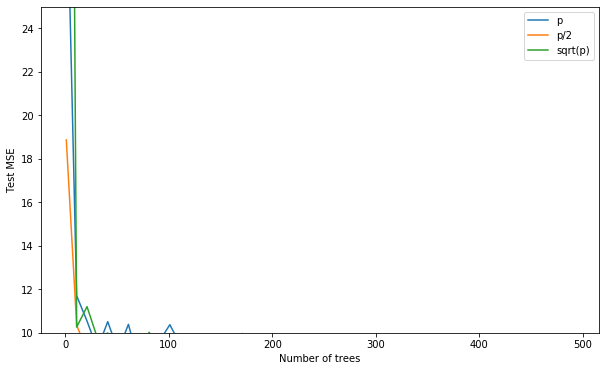

In [9]:
df.plot(figsize = (10, 6))
plt.ylim(10, 25)
plt.xlabel('Number of trees')
plt.ylabel('Test MSE')

In [10]:
# 8. In the lab, a classification tree was applied to the Carseats data set after converting Sales into a 
# qualitative response variable. Now we will seek to predict Sales using regression trees and related 
# approaches, treating the response as a quantitative variable

carseats = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Carseats.csv')
print(carseats.shape)
carseats.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:

# Going through the data columns - 
# - Sales: unit sales in thousands
# - CompPrice: price charged by competitor at each location
# - Income: community income level in 1000s of dollars
# - Advertising: local ad budget at each location in 1000s of dollars
# - Population: regional pop in thousands
# - Price: price for car seats at each site
# - ShelveLoc: Bad, Good or Medium indicates quality of shelving location
# - Age: age level of the population
# - Education: ed level at location
# - Urban: Yes/No
# - US: Yes/No

In [12]:
data = carseats.copy()
yes_no_dict = {'Yes':1,'No':0}
data['Urban'] = data['Urban'].map(yes_no_dict)
data['US'] = data['US'].map(yes_no_dict)
data['ShelveLoc'] = data['ShelveLoc'].map({'Bad':0,'Good':1,'Medium':3})

In [13]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [14]:
### (a) Split the data set into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sales', axis = 1), data['Sales'], test_size = 0.5, random_state = 1)
print(X_train.shape, X_test.shape)

(200, 10) (200, 10)


In [15]:
# (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you 
# obtain?

model = DecisionTreeRegressor().fit(X_train, y_train)
print(f'Training MSE is : {mean_squared_error(y_train, model.predict(X_train))}')

Training MSE is : 0.0


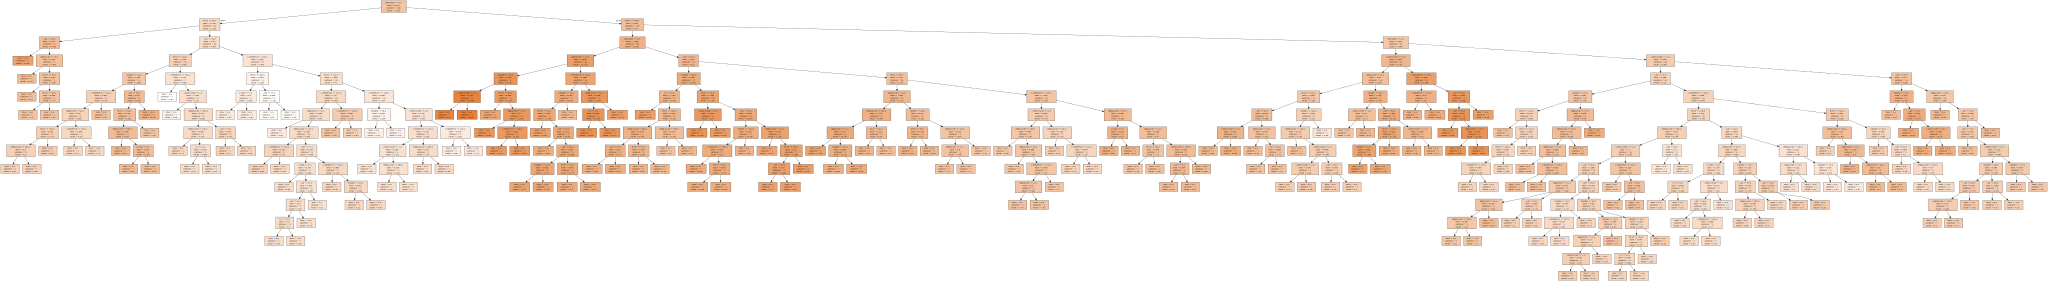

In [16]:
# Plotting the tree
dot_data = tree.export_graphviz(model, out_file = None, feature_names = X_train.columns , filled = True)

# Draw graph
graph = graphviz.Source(dot_data)

graph # overfitted

In [17]:
#test mse 
print('Test MSE is ',mean_squared_error(y_test,model.predict(X_test)))
print('Test R2 score is ',model.score(X_test,y_test)) # it is pretty poor

Test MSE is  5.937543499999999
Test R2 score is  0.2221112121005702


In [18]:
# (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree 
# improve the test MSE?

scores_dict = {}
for max_depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=max_depth)
    scores_dict[max_depth] = -np.mean(cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10))
    

Text(0, 0.5, '10 CV Error')

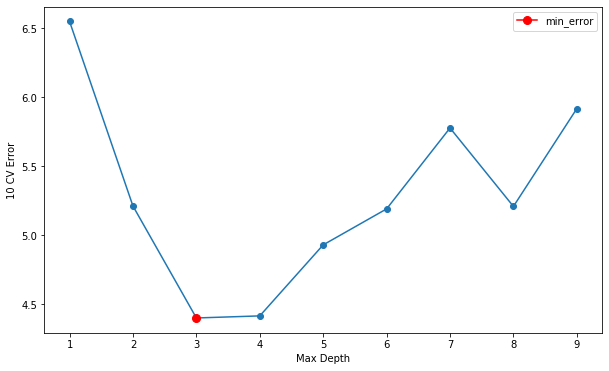

In [19]:
plt.figure(figsize = (10, 6))

plt.plot(list(scores_dict.keys()), list(scores_dict.values()), marker = 'o')
plt.plot(min(scores_dict, key = scores_dict.get), min(list(scores_dict.values())), marker = 'o', markersize = 8, c = 'r', label = 'min_error')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('10 CV Error')

In [20]:
# from the above graph, we get 4 as the best value of max_depth
best_model = DecisionTreeRegressor(max_depth = 4)
best_model.fit(X_train,y_train)
print('Training MSE is ',mean_squared_error(y_train,best_model.predict(X_train)))
print('Test MSE is ',mean_squared_error(y_test,best_model.predict(X_test)))

Training MSE is  2.2486282645877234
Test MSE is  4.762518554367466


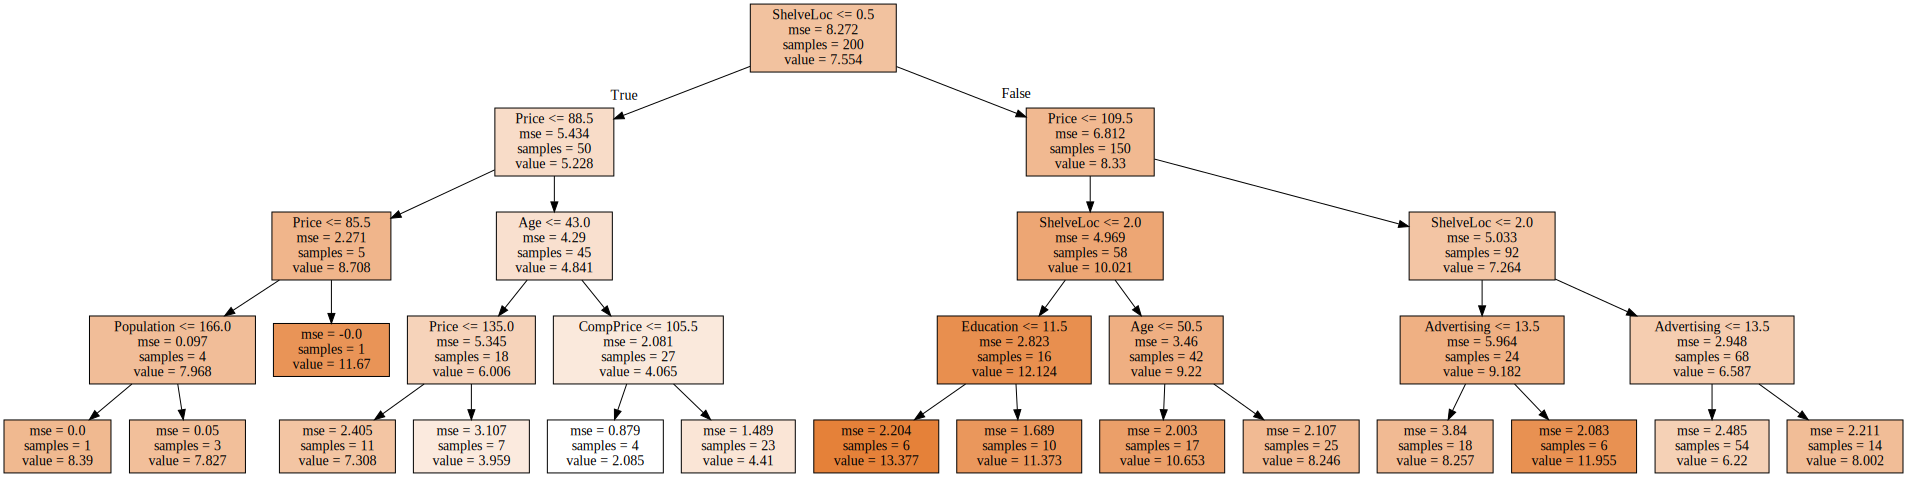

In [21]:
# plotting the tree

dot_data = tree.export_graphviz(best_model, out_file= None, feature_names = X_train.columns, filled = True)

graph = graphviz.Source(dot_data)
graph

In [22]:
# feature importance for best model
best_model.feature_importances_
# pd.Seris(best_model.feature_importances_,)

array([1.52847662e-02, 0.00000000e+00, 8.03976974e-02, 1.97580204e-04,
       3.29376058e-01, 4.79825046e-01, 8.24210551e-02, 1.24977974e-02,
       0.00000000e+00, 0.00000000e+00])

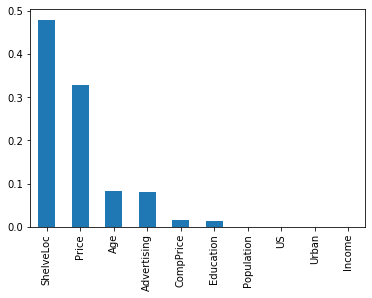

In [23]:
# feature importance for best model

pd.Series(best_model.feature_importances_, index = X_train.columns).sort_values(ascending = False).plot.bar()

In [24]:
# From the above graph it is clear that Shelveloc and Price are the most important features to detect the price. 
# So, if someone is starting a new store, just make sure the shelveLoc is Good!

In [25]:
# (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the importance() 
# function to determine which variables are most important.

base_reg = DecisionTreeRegressor()
bagging = BaggingRegressor(base_reg).fit(X_train, y_train)

print(f'Training MSE: {mean_squared_error(y_train, bagging.predict(X_train))}')
print(f'Test MSE: {mean_squared_error(y_test, bagging.predict(X_test))}')

Training MSE: 0.604894775
Test MSE: 3.128558155000001


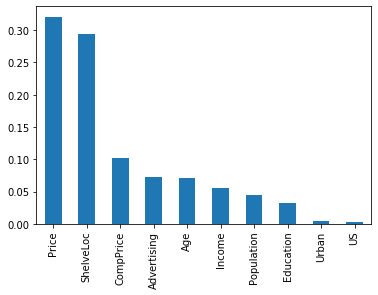

In [26]:
# going through each of the estimator in baggin model to calculate feature importance
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis = 0)
pd.Series(feature_importances, index = X_train.columns).sort_values(ascending = False).plot.bar()

In [27]:
# Unlike the decision tree regressor, bagging model gives similar importance to ShelveLoc and Price, 
# infact here importance of Price is slightly greater than ShelveLoc. So, if someone is starting a new store, 
# we would suggest - "hey buddy, keep the condition of ShelveLoc good, but keep the price reasonable too" :D

In [28]:
# (e) Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to 
# determine which variables are most important. Describe the effect of m, the number of variables considered 
# at each split, on the error rate obtained.


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'Training MSE is: {mean_squared_error(y_train, rf.predict(X_train))}')
print(f'Test MSE is: {mean_squared_error(y_test, rf.predict(X_test))}')

Training MSE is: 0.3999947770999998
Test MSE is: 2.8582302375500013


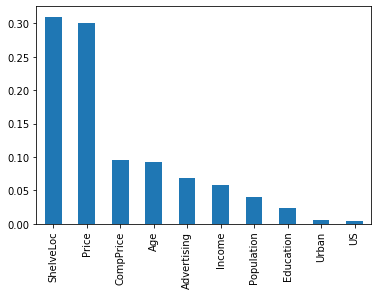

In [29]:
#feature importance
pd.Series(rf.feature_importances_,index = X_train.columns).sort_values(ascending=False).plot.bar()

In [31]:
### Effect of max_features (m)

scores_dict = {}
for max_feature_value in range(1, 11):
    rf = RandomForestRegressor(max_features=max_feature_value).fit(X_train, y_train)
    scores_dict[max_feature_value] = mean_squared_error(y_test, rf.predict(X_test))

Text(0, 0.5, 'Test error')

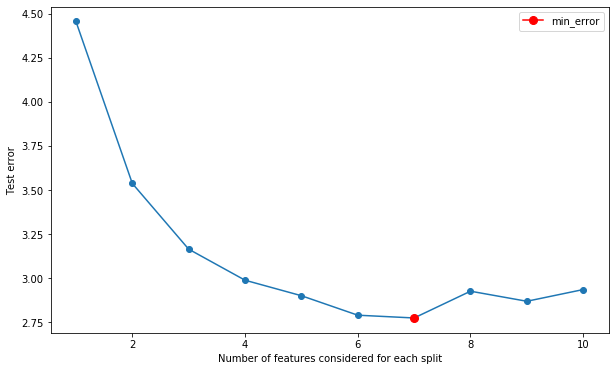

In [32]:
plt.figure(figsize  =(10, 6))
plt.plot(list(scores_dict.keys()), list(scores_dict.values()), marker = 'o')
plt.plot(min(scores_dict, key = scores_dict.get), min(list(scores_dict.values())), marker = 'o', markersize = 8, c = 'r', label = 'min_error')
plt.legend()
plt.xlabel('Number of features considered for each split')
plt.ylabel('Test error')

In [36]:
# 9. This problem involves the OJ data set which is part of the ISLR package.

data = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/OJ.csv')
print(data.shape)
data.head()

(1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [35]:
# Lets go through the dataset, and see what it describes
# - Purchase-A factor with levels CH and MM indicating whether the customer purchased Citrus Hill or Minute Maid Orange Juice

# - WeekofPurchase - Week of purchase
# - StoreID-Store ID
# - PriceCH-Price charged for CH
# - PriceMM-Price charged for MM
# - DiscCH-Discount offered for CH
# - DiscMM-Discount offered for MM
# - SpecialCH-Indicator of special on CH
# - SpecialMM-Indicator of special on MM
# - LoyalCH-Customer brand loyalty for CH
# - SalePriceMM-Sale price for MM
# - SalePriceCH-Sale price for CH
# - PriceDiff-Sale price of MM less sale price of CH
# - Store7-A factor with levels No and Yes indicating whether the sale is at Store 7
# - PctDiscMM-Percentage discount for MM
# - PctDiscCH-Percentage discount for CH
# - ListPriceDiff-List price of MM less list price of CH
# - STORE-Which of 5 possible stores the sale occured at

In [37]:
data['Purchase'].value_counts()

CH    653
MM    417
Name: Purchase, dtype: int64

In [38]:
#encoding the categorical columns
data['Purchase'] = data['Purchase'].map({'CH':0,'MM':1})
data['Store7'] = data['Store7'].map({'Yes':1,'No':0})
data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [41]:
# (a) Create a training set containing a random sample of 800 observations, and a test set containing the 
# remaining observations.

X_train,X_test,y_train,y_test = train_test_split(data.drop('Purchase',axis=1),data['Purchase'],train_size = 800,random_state=1)
print(X_train.shape,X_test.shape)

(800, 17) (270, 17)


In [42]:
# (b) Fit a tree to the training data, with Purchase as the response and the other variables except for Buy as 
# predictors. Use the summary() function to produce summary statistics about the tree, and describe the results 
# obtained. What is the training error rate? How many terminal nodes does the tree have?

model = DecisionTreeClassifier().fit(X_train, y_train)
print(f'Training error: {1 - model.score(X_train, y_train)}')

Training error: 0.010000000000000009


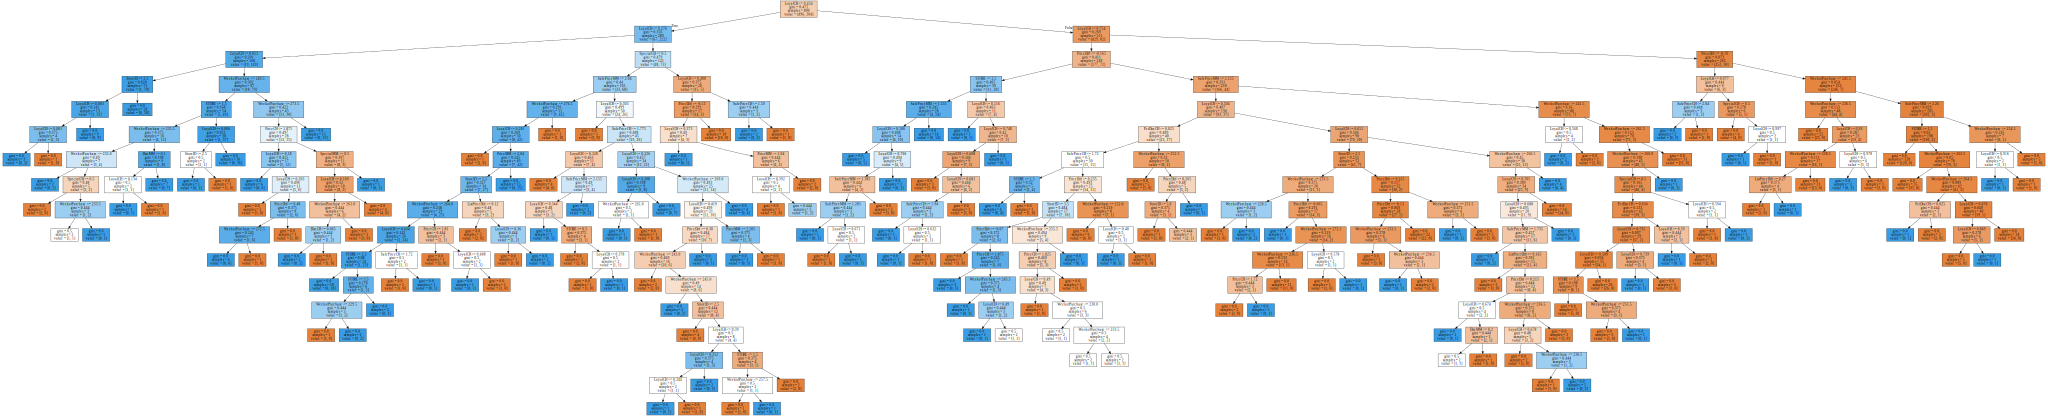

In [43]:
# (d) Create a plot of the tree, and interpret the results.

dot_data = tree.export_graphviz(model, out_file = None, feature_names = X_train.columns, filled = True)

graph = graphviz.Source(dot_data)
graph

In [44]:
# (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

y_preds = model.predict(X_test)
print(f'Test error is: {1 - accuracy_score(y_test, y_preds)}')

Test error is: 0.2407407407407407


In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_preds)
pd.DataFrame(cm, columns = ['Pred_0', 'Pred_1'], index = ['True_0', 'True_1'])

,Pred_0,Pred_1
True_0,133,24
True_1,41,72


In [46]:
# (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

cv_scores_dict = {}
for max_depth in range(1,15):
    model = DecisionTreeClassifier(max_depth=max_depth)
    cv_scores_dict[max_depth] = 1 - np.mean(cross_val_score(model,X_train,y_train,cv = 10))
    

Text(0, 0.5, '10 CV Error')

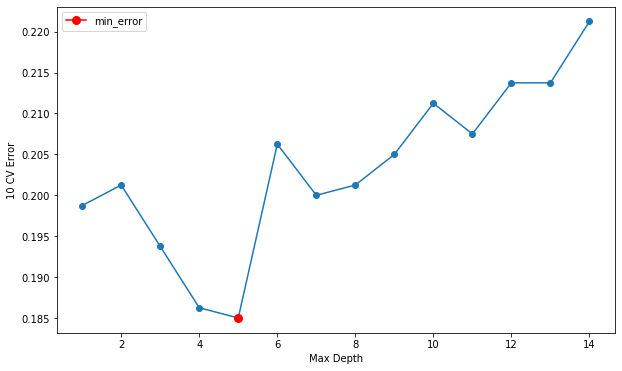

In [47]:
plt.figure(figsize = (10,6))
plt.plot(list(cv_scores_dict.keys()),list(cv_scores_dict.values()),marker = 'o')
plt.plot(min(cv_scores_dict, key=cv_scores_dict.get),min(list(cv_scores_dict.values())),marker = 'o',markersize = 8,c='r',label = 'min_error')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('10 CV Error')

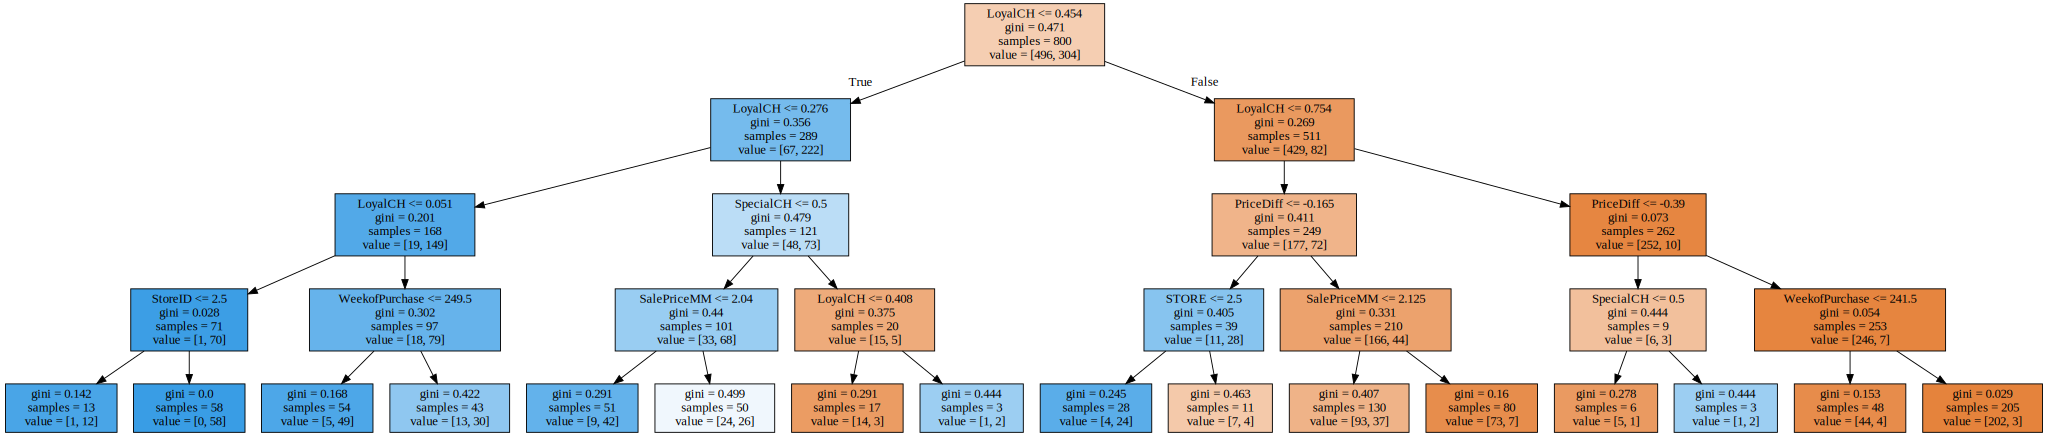

In [48]:
# (h) Which tree size corresponds to the lowest cross-validated classification error rate?

# Tree with max_depth = 4, is giving the minimum cv error.

best_model = DecisionTreeClassifier(max_depth = 4)
best_model.fit(X_train,y_train)
dot_data = tree.export_graphviz(best_model, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data) 
graph

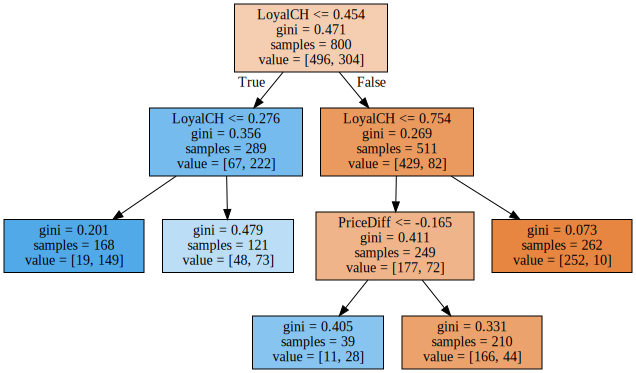

In [51]:
# (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

# pruned tree with 5 terminal nodes
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5)
pruned_tree.fit(X_train,y_train)
dot_data = tree.export_graphviz(pruned_tree, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data) 
graph

In [52]:
unpruned_tree = DecisionTreeClassifier()
unpruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
# (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

print('Training error for pruned ',np.round(1 - (pruned_tree.score(X_train,y_train)),4))
print('Training error for unpruned ',np.round(1 - (unpruned_tree.score(X_train,y_train)),4))

Training error for pruned  0.165
Training error for unpruned  0.01


In [54]:
# (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

print('Test error for pruned ',np.round(1 - (pruned_tree.score(X_test,y_test)),4))
print('Test error for unpruned ',np.round(1 - (unpruned_tree.score(X_test,y_test)),4))

Test error for pruned  0.1815
Test error for unpruned  0.2481
